In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train, test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 4s 80ms/step - loss: 0.0684 - val_loss: 0.0074
Epoch 2/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0099 - val_loss: 0.0041
Epoch 3/100
23/23 [==============================] - 1s 55ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
23/23 [==============================] - 1s 56ms/step - loss: 8.0297e-04 - val_loss: 8.8798e-04
Epoch 5/100
23/23 [==============================] - 2s 90ms/step - loss: 6.8075e-04 - val_loss: 8.2604e-04
Epoch 6/100
23/23 [==============================] - 2s 93ms/step - loss: 6.4904e-04 - val_loss: 7.9394e-04
Epoch 7/100
23/23 [==============================] - 1s 57ms/step - loss: 6.1333e-04 - val_loss: 7.6590e-04
Epoch 8/100
23/23 [==============================] - 1s 58ms/step - loss: 5.9604e-04 - val_loss: 7.8383e-04
Epoch 9/100
23/23 [==============================] - 1s 61ms/step - loss: 5.7250e-04 - val_loss: 7.0303e-04
Epoch 10/100
23/23 [==============================] 

In [10]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)

9/9 [==============================] - 0s 12ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1009.685009953125
Testing RMSE: 1531.4176222234505
Testing MAPE: 0.02097556347544397


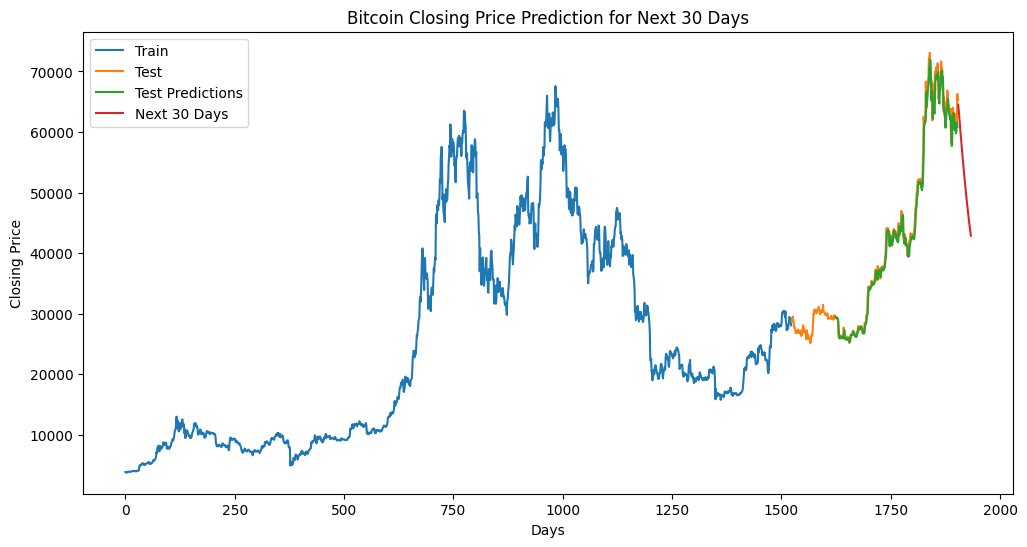

Predicted closing prices for the next 30 days:
[64492.848 63754.082 62894.586 62002.48  61106.094 60214.844 59332.836
 58461.254 57601.945 56755.438 55922.438 55103.1   54298.016 53507.285
 52731.51  51970.883 51225.453 50494.98  49779.547 49078.37  48391.61
 47718.984 47062.12  46420.12  45793.457 45181.492 44583.97  44002.586
 43435.52  42883.363]


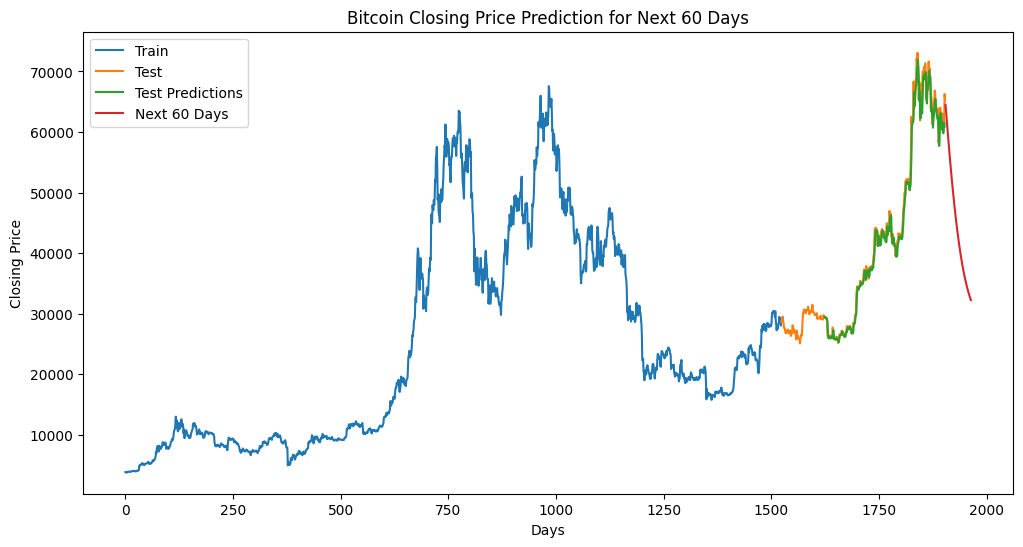

Predicted closing prices for the next 60 days:
[64492.848 63754.082 62894.586 62002.48  61106.094 60214.844 59332.836
 58461.254 57601.945 56755.438 55922.438 55103.1   54298.016 53507.285
 52731.51  51970.883 51225.453 50494.98  49779.547 49078.37  48391.61
 47718.984 47062.12  46420.12  45793.457 45181.492 44583.97  44002.586
 43435.52  42883.363 42345.816 41822.957 41314.445 40819.883 40339.652
 39873.285 39421.137 38983.03  38558.863 38147.562 37749.707 37365.125
 36992.312 36632.23  36284.13  35947.43  35621.613 35306.504 35001.96
 34707.6   34423.016 34148.04  33882.273 33625.34  33377.203 33137.566
 32905.81  32681.646 32464.918 32255.213]


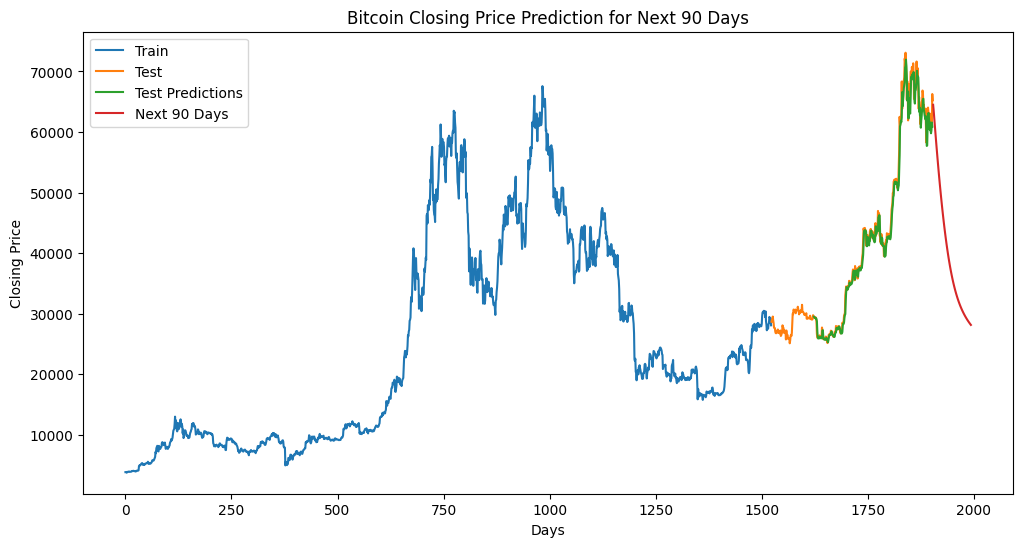

Predicted closing prices for the next 90 days:
[64492.848 63754.082 62894.586 62002.48  61106.094 60214.844 59332.836
 58461.254 57601.945 56755.438 55922.438 55103.1   54298.016 53507.285
 52731.51  51970.883 51225.453 50494.98  49779.547 49078.37  48391.61
 47718.984 47062.12  46420.12  45793.457 45181.492 44583.97  44002.586
 43435.52  42883.363 42345.816 41822.957 41314.445 40819.883 40339.652
 39873.285 39421.137 38983.03  38558.863 38147.562 37749.707 37365.125
 36992.312 36632.23  36284.13  35947.43  35621.613 35306.504 35001.96
 34707.6   34423.016 34148.04  33882.273 33625.34  33377.203 33137.566
 32905.81  32681.646 32464.918 32255.213 32052.283 31855.826 31665.719
 31481.549 31303.215 31130.518 30963.19  30800.895 30643.555 30490.863
 30342.69  30198.695 30058.773 29922.719 29790.37  29661.541 29536.135
 29413.996 29294.959 29178.9   29065.69  28955.201 28847.322 28741.979
 28639.04  28538.348 28439.814 28343.377 28248.94  28156.436]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [15]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train, test, validate
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 4s 86ms/step - loss: 0.0663 - val_loss: 0.0106
Epoch 2/100
20/20 [==============================] - 1s 60ms/step - loss: 0.0100 - val_loss: 0.0056
Epoch 3/100
20/20 [==============================] - 1s 59ms/step - loss: 0.0018 - val_loss: 5.8133e-04
Epoch 4/100
20/20 [==============================] - 2s 95ms/step - loss: 7.7939e-04 - val_loss: 5.6827e-04
Epoch 5/100
20/20 [==============================] - 2s 98ms/step - loss: 6.9240e-04 - val_loss: 5.8293e-04
Epoch 6/100
20/20 [==============================] - 1s 71ms/step - loss: 6.7521e-04 - val_loss: 5.2331e-04
Epoch 7/100
20/20 [==============================] - 1s 58ms/step - loss: 6.5745e-04 - val_loss: 5.0423e-04
Epoch 8/100
20/20 [==============================] - 1s 64ms/step - loss: 6.1480e-04 - val_loss: 4.7012e-04
Epoch 9/100
20/20 [==============================] - 1s 61ms/step - loss: 5.9755e-04 - val_loss: 4.6728e-04
Epoch 10/100
20/20 [============================

In [22]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)

15/15 [==============================] - 0s 13ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 795.2197077269108
Testing RMSE: 1180.2572872498495
Testing MAPE: 0.020625595026456504


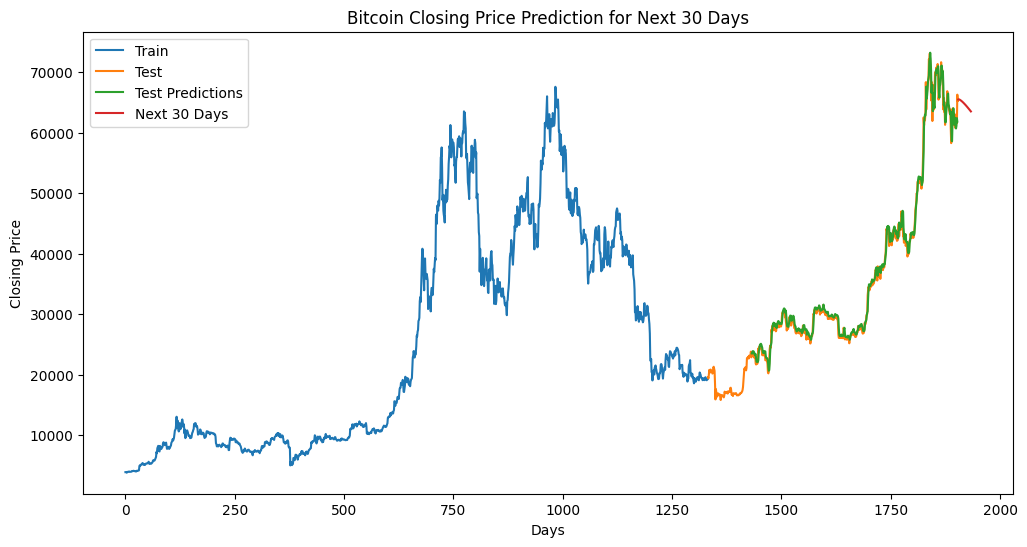

Predicted closing prices for the next 30 days:
[65463.348 65494.52  65482.09  65450.348 65409.203 65361.715 65309.54
 65253.066 65193.06  65129.742 65063.473 64994.41  64922.945 64849.25
 64773.793 64696.773 64618.332 64538.426 64457.17  64374.188 64289.625
 64203.477 64117.    64029.63  63941.8   63853.12  63763.586 63674.73
 63585.07  63495.32 ]


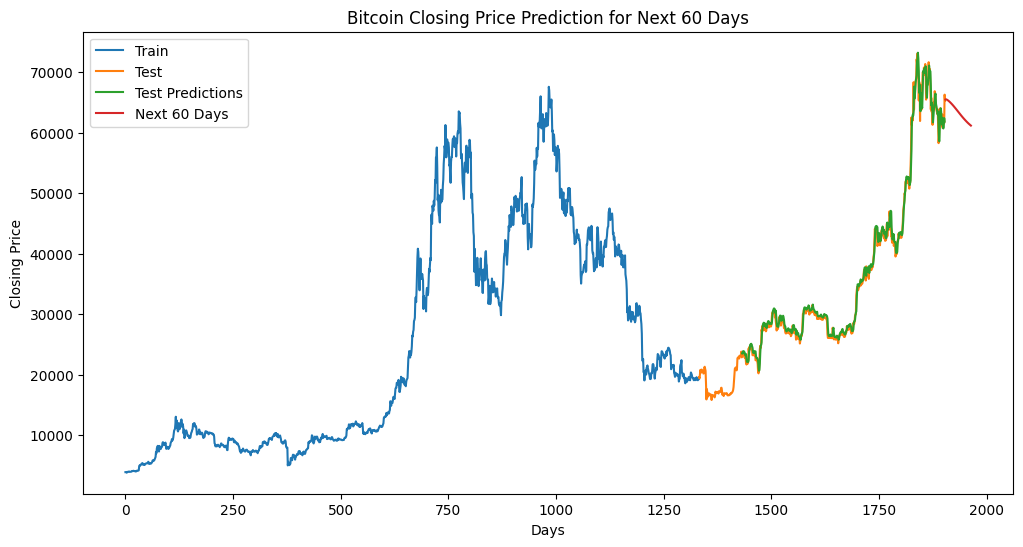

Predicted closing prices for the next 60 days:
[65463.348 65494.52  65482.09  65450.348 65409.203 65361.715 65309.54
 65253.066 65193.06  65129.742 65063.473 64994.41  64922.945 64849.25
 64773.793 64696.773 64618.332 64538.426 64457.17  64374.188 64289.625
 64203.477 64117.    64029.63  63941.8   63853.12  63763.586 63674.73
 63585.07  63495.32  63405.406 63315.53  63225.562 63135.355 63045.562
 62955.94  62867.293 62779.71  62693.33  62607.316 62522.84  62439.98
 62357.27  62276.56  62197.176 62118.79  62041.094 61964.38  61889.02
 61814.953 61742.06  61670.67  61600.637 61531.926 61465.227 61400.605
 61337.258 61275.258 61214.957 61156.01 ]


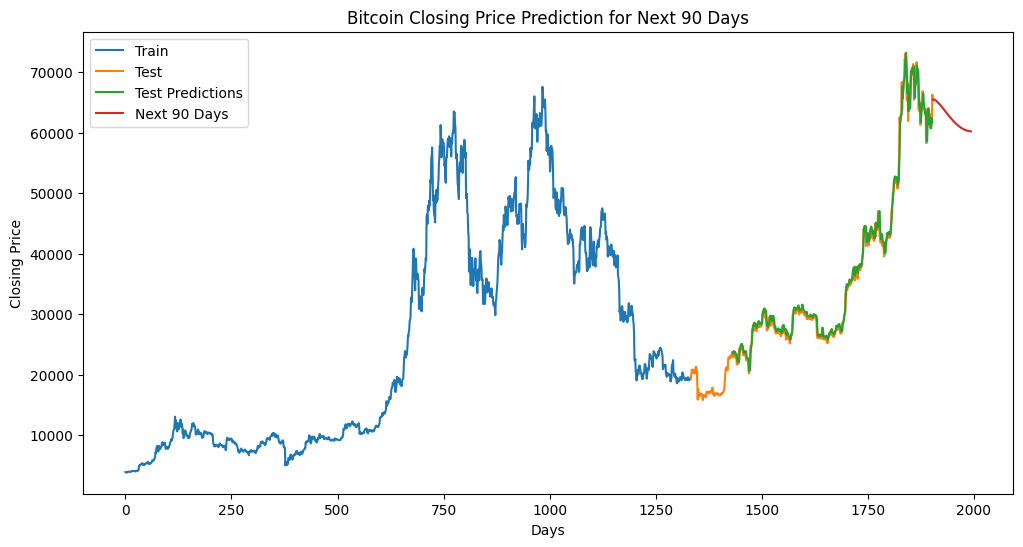

Predicted closing prices for the next 90 days:
[65463.348 65494.52  65482.09  65450.348 65409.203 65361.715 65309.54
 65253.066 65193.06  65129.742 65063.473 64994.41  64922.945 64849.25
 64773.793 64696.773 64618.332 64538.426 64457.17  64374.188 64289.625
 64203.477 64117.    64029.63  63941.8   63853.12  63763.586 63674.73
 63585.07  63495.32  63405.406 63315.53  63225.562 63135.355 63045.562
 62955.94  62867.293 62779.71  62693.33  62607.316 62522.84  62439.98
 62357.27  62276.56  62197.176 62118.79  62041.094 61964.38  61889.02
 61814.953 61742.06  61670.67  61600.637 61531.926 61465.227 61400.605
 61337.258 61275.258 61214.957 61156.01  61098.516 61042.41  60988.184
 60935.332 60884.4   60835.637 60788.934 60743.78  60700.863 60659.742
 60620.69  60583.062 60547.2   60512.93  60480.312 60449.18  60419.914
 60392.55  60366.82  60342.887 60320.652 60300.13  60281.375 60264.855
 60250.113 60236.69  60224.383 60213.582 60204.28  60196.582]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [27]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train, test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 5s 109ms/step - loss: 0.0822 - val_loss: 0.0100
Epoch 2/100
17/17 [==============================] - 1s 66ms/step - loss: 0.0155 - val_loss: 0.0047
Epoch 3/100
17/17 [==============================] - 1s 67ms/step - loss: 0.0042 - val_loss: 6.6667e-04
Epoch 4/100
17/17 [==============================] - 1s 66ms/step - loss: 9.6564e-04 - val_loss: 7.2683e-04
Epoch 5/100
17/17 [==============================] - 1s 67ms/step - loss: 7.9648e-04 - val_loss: 4.2632e-04
Epoch 6/100
17/17 [==============================] - 1s 67ms/step - loss: 6.7572e-04 - val_loss: 3.7442e-04
Epoch 7/100
17/17 [==============================] - 1s 68ms/step - loss: 6.3162e-04 - val_loss: 3.7145e-04
Epoch 8/100
17/17 [==============================] - 1s 68ms/step - loss: 6.1235e-04 - val_loss: 3.5200e-04
Epoch 9/100
17/17 [==============================] - 1s 72ms/step - loss: 5.9710e-04 - val_loss: 3.4647e-04
Epoch 10/100
17/17 [===========================

In [34]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)

21/21 [==============================] - 0s 13ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 720.749920121974
Testing RMSE: 1085.4156651793471
Testing MAPE: 0.02202115774596563


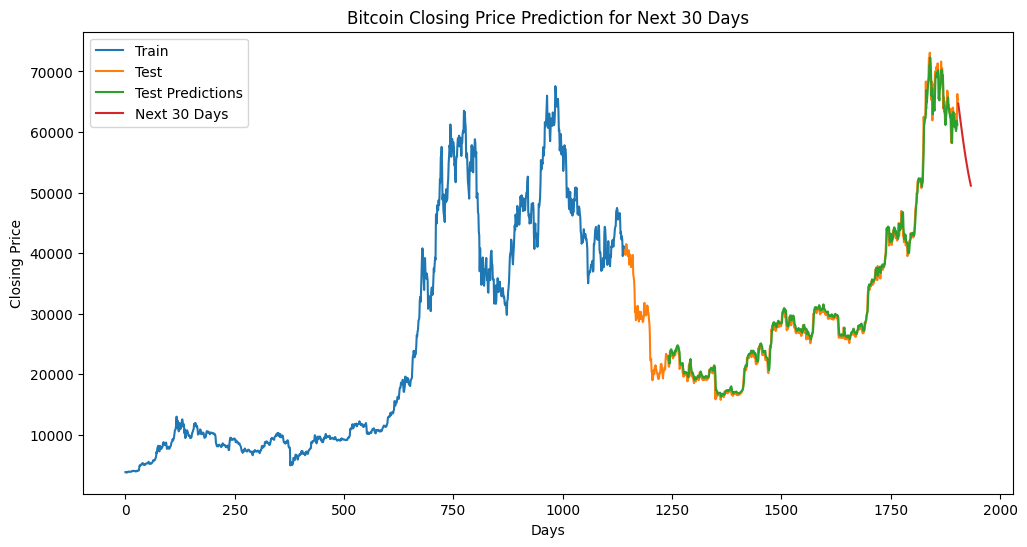

Predicted closing prices for the next 30 days:
[64713.8   64221.5   63676.06  63117.652 62556.008 61995.125 61437.82
 60885.26  60339.113 59800.12  59269.1   58746.453 58232.934 57728.863
 57235.008 56751.656 56279.043 55817.055 55365.93  54925.1   54494.816
 54075.062 53667.633 53271.59  52887.52  52514.77  52153.27  51805.04
 51467.91  51142.758]


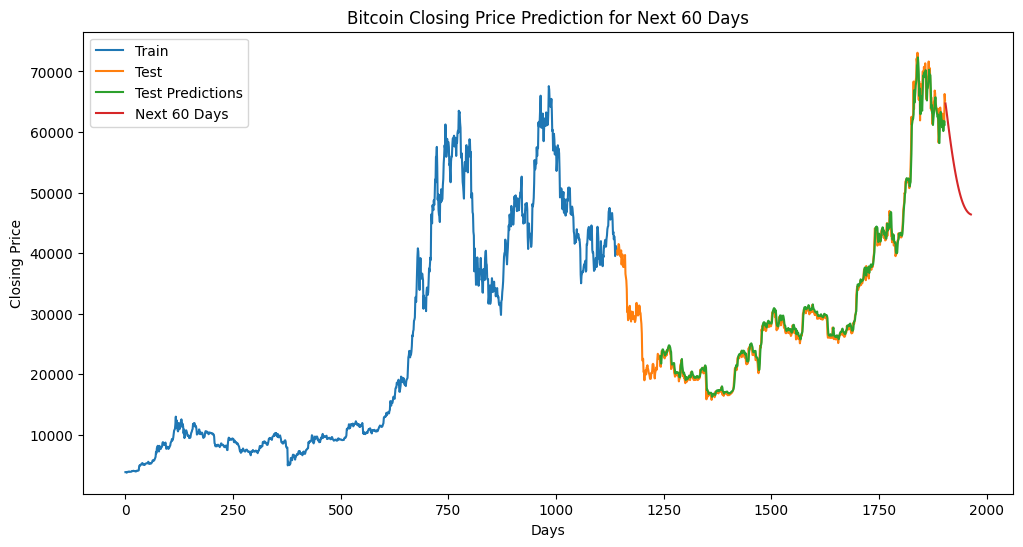

Predicted closing prices for the next 60 days:
[64713.8   64221.5   63676.06  63117.652 62556.008 61995.125 61437.82
 60885.26  60339.113 59800.12  59269.1   58746.453 58232.934 57728.863
 57235.008 56751.656 56279.043 55817.055 55365.93  54925.1   54494.816
 54075.062 53667.633 53271.59  52887.52  52514.77  52153.27  51805.04
 51467.91  51142.758 50829.344 50527.844 50237.926 49959.234 49692.477
 49437.11  49193.855 48962.57  48743.133 48534.332 48337.22  48151.594
 47975.652 47811.023 47656.746 47512.242 47376.984 47251.    47134.36
 47026.71  46927.66  46837.223 46754.96  46680.57  46614.277 46555.83
 46504.33  46459.57  46421.562 46389.793]


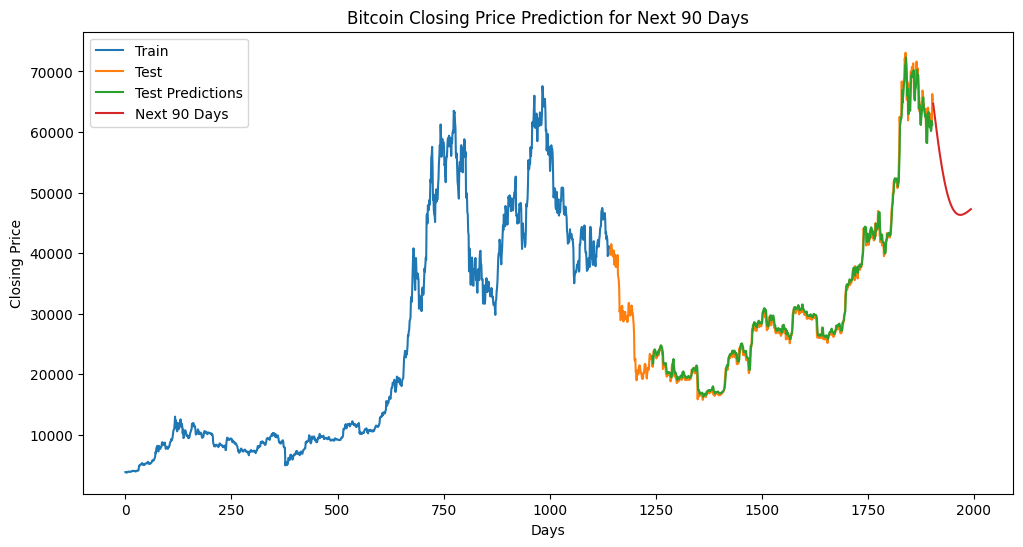

Predicted closing prices for the next 90 days:
[64713.8   64221.5   63676.06  63117.652 62556.008 61995.125 61437.82
 60885.26  60339.113 59800.12  59269.1   58746.453 58232.934 57728.863
 57235.008 56751.656 56279.043 55817.055 55365.93  54925.1   54494.816
 54075.062 53667.633 53271.59  52887.52  52514.77  52153.27  51805.04
 51467.91  51142.758 50829.344 50527.844 50237.926 49959.234 49692.477
 49437.11  49193.855 48962.57  48743.133 48534.332 48337.22  48151.594
 47975.652 47811.023 47656.746 47512.242 47376.984 47251.    47134.36
 47026.71  46927.66  46837.223 46754.96  46680.57  46614.277 46555.83
 46504.33  46459.57  46421.562 46389.793 46364.08  46344.082 46329.918
 46320.94  46317.25  46318.727 46325.016 46335.605 46350.598 46369.555
 46392.383 46418.54  46447.984 46480.426 46515.723 46553.562 46593.973
 46636.75  46681.605 46728.43  46776.99  46827.16  46878.758 46931.83
 46986.047 47041.094 47096.82  47153.21  47210.15  47267.53 ]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())